In [38]:
#!pip install --upgrade scipy==1.8 networkx==2.7

  Using cached scipy-1.8.0-cp39-cp39-macosx_12_0_universal2.macosx_10_9_x86_64.whl (55.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.1
    Uninstalling scipy-1.8.1:
      Successfully uninstalled scipy-1.8.1
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


# Normalización


Lo que te decía es calcular los links por sujeto, hacer, el grafo/histograma de tal manera que la suma de los links de 1. 

Estas matrices de adyacencia normalizadas de esta manera pueden ser sujetas a ser analizadas en el plano complejidad-entropía (C-H). 

Una vez que tengamos todas estas matrices normalizadas de los sujetos podemos sumarlas por grupo y luego volver a normalizar esta suma. De esta manera supongo que tendríamos un grafo de probabilidades de transiciones por grupo. A esta matriz también la podemos ubicar en el plano C-H. 

In [1]:
import pandas as pd

graphs_links = pd.read_csv('graphs_links.csv')
graphs_links

,ident,diag,pattern_source,pattern_target,count,link
0,1-,NT,12,12,17,012-012
1,1-,NT,12,21,13,012-021
2,1-,NT,12,201,11,012-201
3,1-,NT,21,102,16,021-102
4,1-,NT,21,120,1,021-120
...,...,...,...,...,...,...
704,8-,DD,201,120,1,201-120
705,8-,DD,201,210,7,201-210
706,8-,DD,210,102,7,210-102
707,8-,DD,210,120,9,210-120


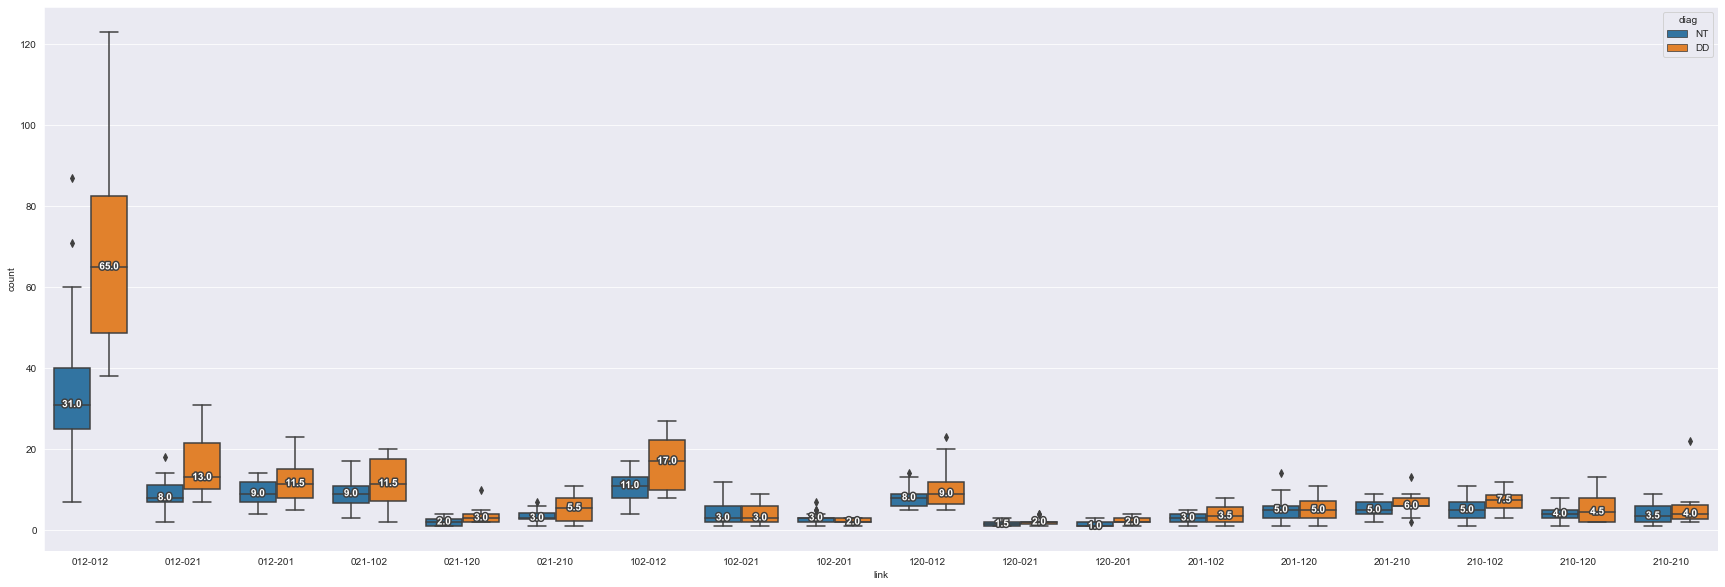

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(30,10))
ax = sns.boxplot(data=graphs_links, x='link', y='count', hue="diag")
add_median_labels(ax)
plt.show()

In [12]:
# subjects
subjects = graphs_links.ident.unique()
subjects

array(['1-', '10', '11', '12', '13', '14', '15', '16', '18', '19', '2-',
       '20', '21', '22', '23', '24', '25', '28', '29', '3-', '31', '32',
       '37', '38', '39', '40', '42', '43', '44', '45', '46', '47', '48',
       '49', '5-', '50', '51', '52', '54', '55', '56', '6-', '8-'],
      dtype=object)

In [17]:
df_normal = pd.DataFrame()

for subject in subjects:
    # patterns of each subject
    subject_ident = graphs_links[graphs_links.ident == subject].ident
    subject_diag = graphs_links[graphs_links.ident == subject].diag
    subject_source = graphs_links[graphs_links.ident == subject].pattern_source
    subject_target = graphs_links[graphs_links.ident == subject].pattern_target
    
    subject_link = graphs_links['link'][graphs_links.ident == subject] 
    subject_count = graphs_links['count'][graphs_links.ident == subject]
    # normalize 
    counts = subject_count.values.reshape(-1,1)
    subject_normal = (counts / counts.sum()).round(3)
    
    temp = pd.DataFrame({'subject': subject_ident, 
                         'diag': subject_diag,
                         'pattern_source': subject_source,
                         'pattern_target': subject_target,
                         'link': subject_link, 
                         'count': subject_count, 
                         'normal_count': subject_normal.ravel()})
    df_normal = pd.concat([df_normal, temp])

df_normal

,subject,diag,pattern_source,pattern_target,link,count,normal_count
0,1-,NT,12,12,012-012,17,0.142
1,1-,NT,12,21,012-021,13,0.108
2,1-,NT,12,201,012-201,11,0.092
3,1-,NT,21,102,021-102,16,0.133
4,1-,NT,21,120,021-120,1,0.008
...,...,...,...,...,...,...,...
704,8-,DD,201,120,201-120,1,0.005
705,8-,DD,201,210,201-210,7,0.032
706,8-,DD,210,102,210-102,7,0.032
707,8-,DD,210,120,210-120,9,0.041


In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy 

In [40]:
# Se crea un grafo vacio
G = nx.Graph()

# Añadir nodos
nodes = df_normal.pattern_source.unique()
G.add_nodes_from(nodes)
print("nodes: ", G.nodes)

nodes:  [12, 21, 102, 120, 201, 210]


In [161]:
plt.rcParams["figure.figsize"] = (15,10)

subject:  1-


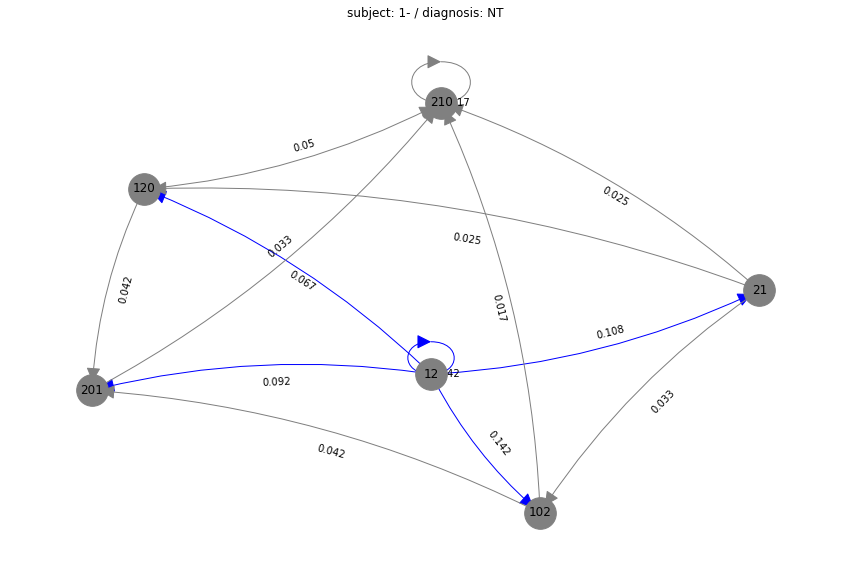

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  10


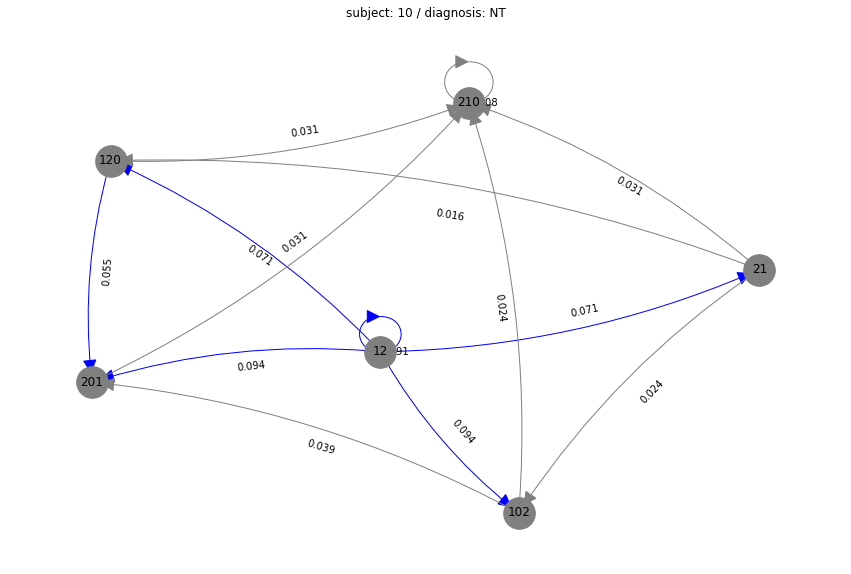

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  11


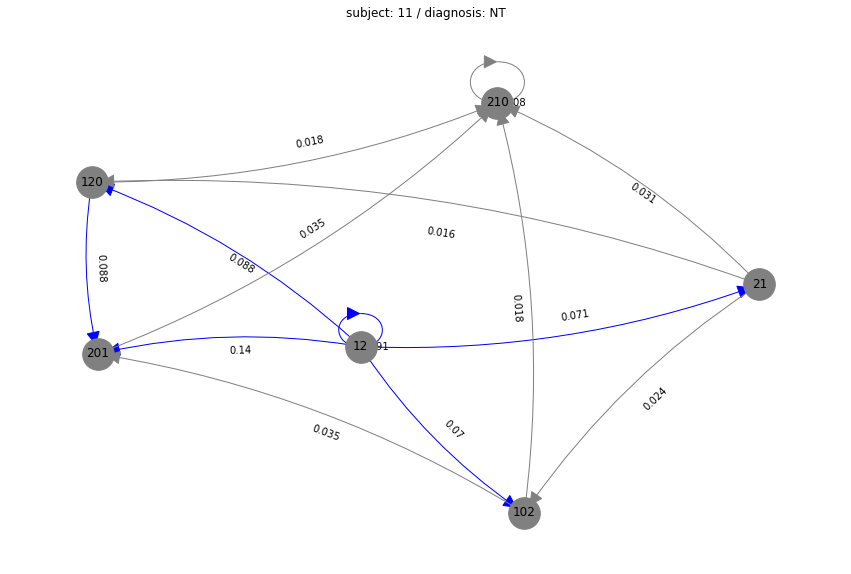

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  12


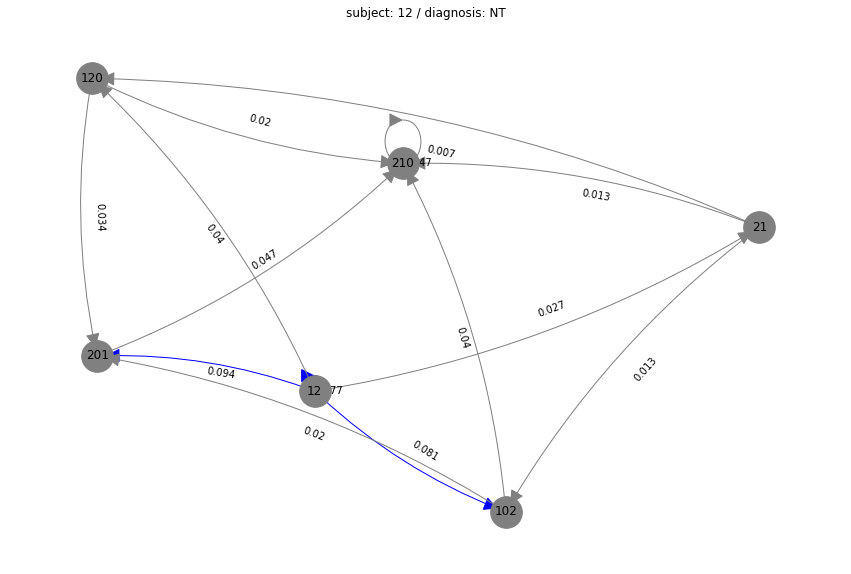

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  13


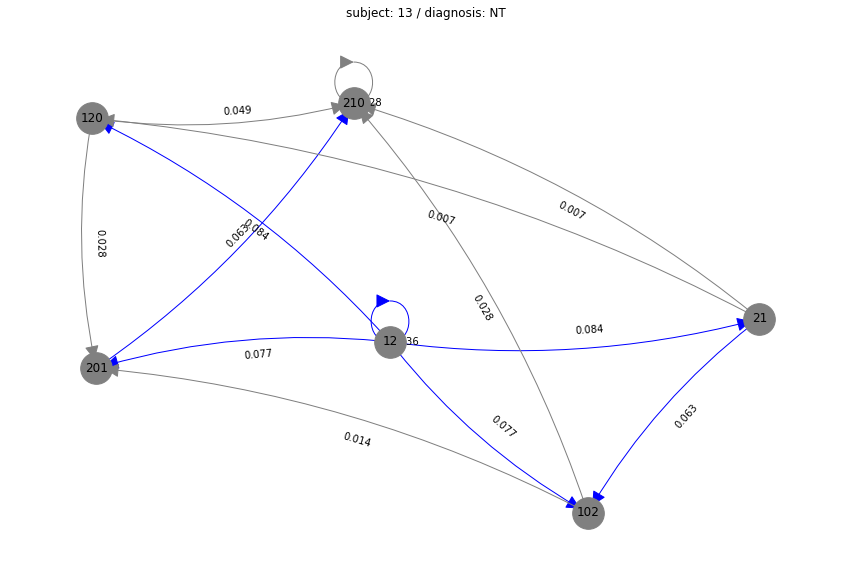

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  14


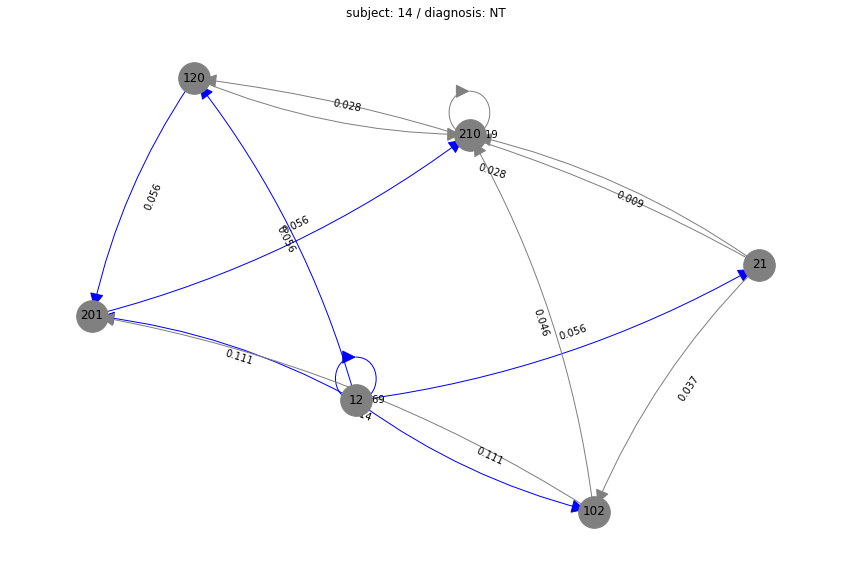

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  15


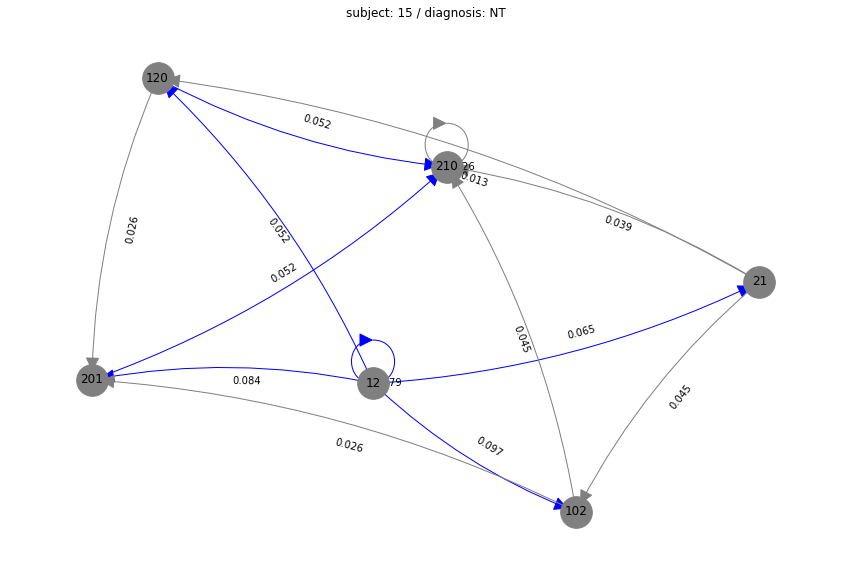

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  16


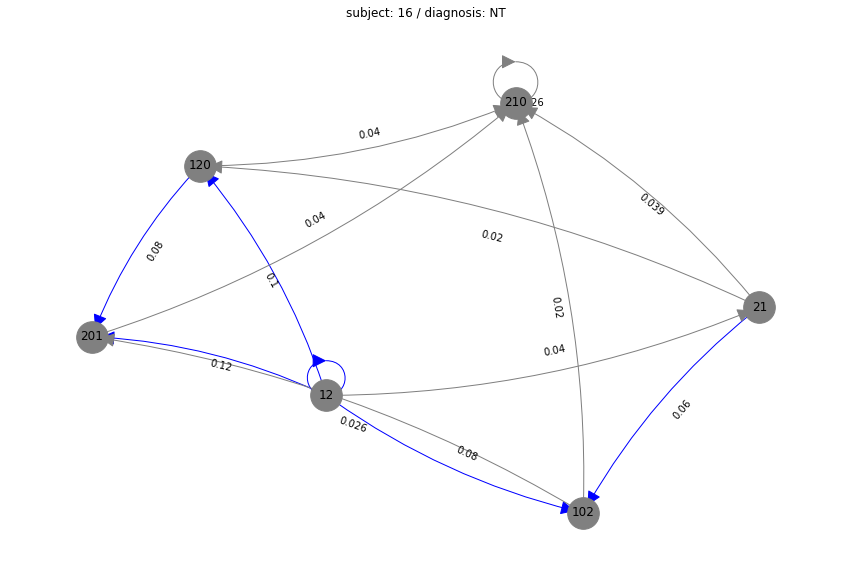

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  18


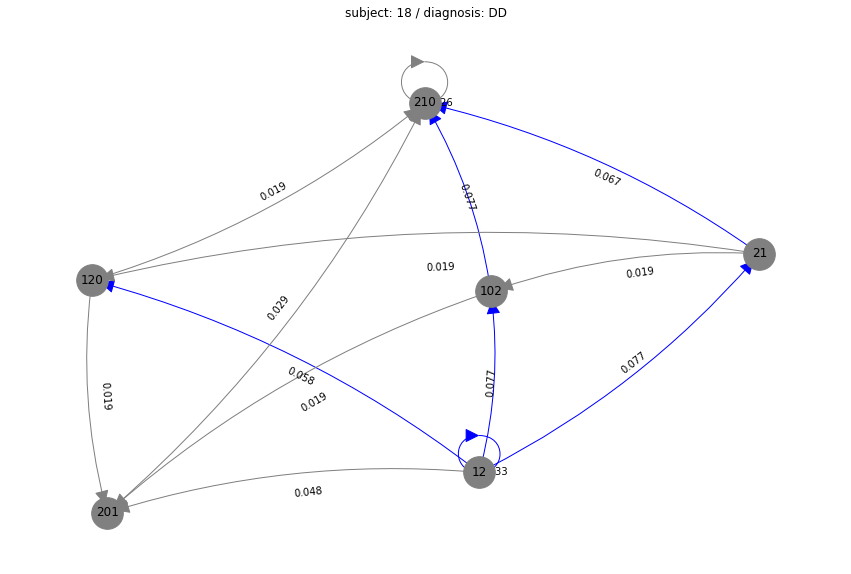

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  19


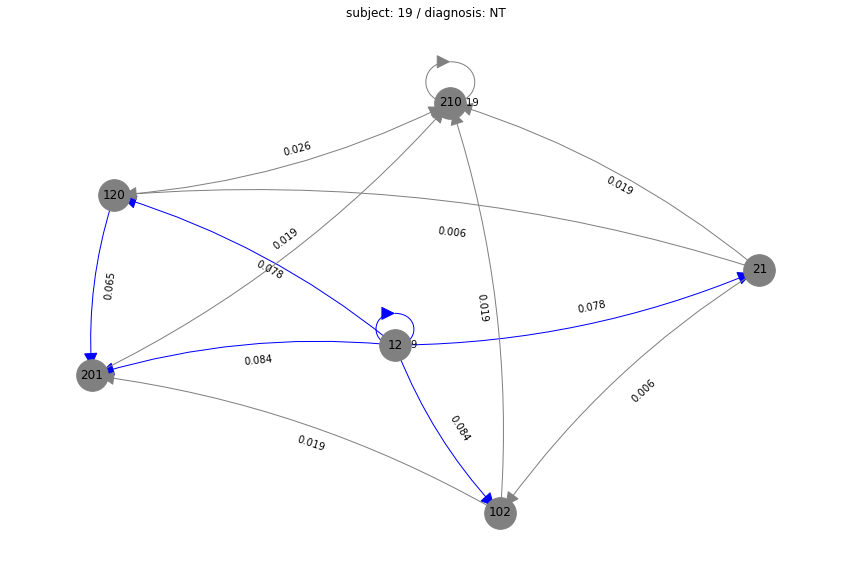

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  2-


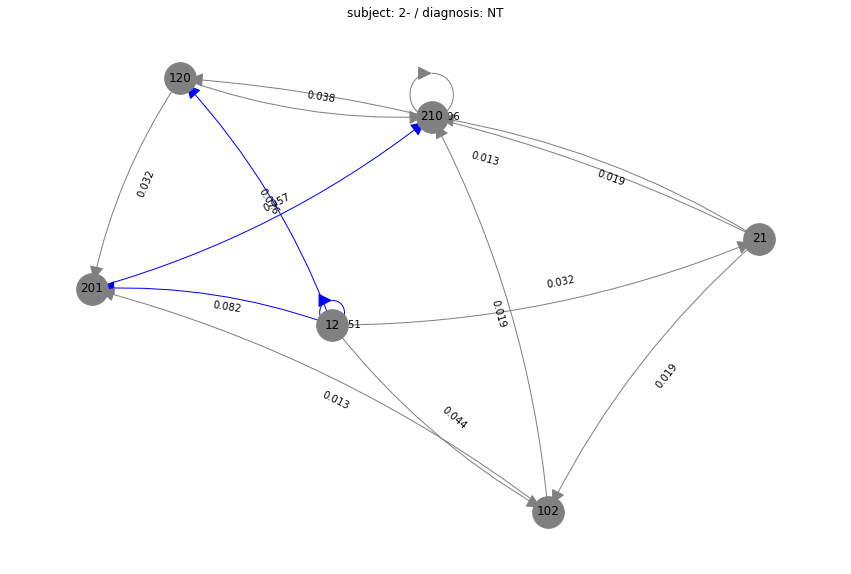

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  20


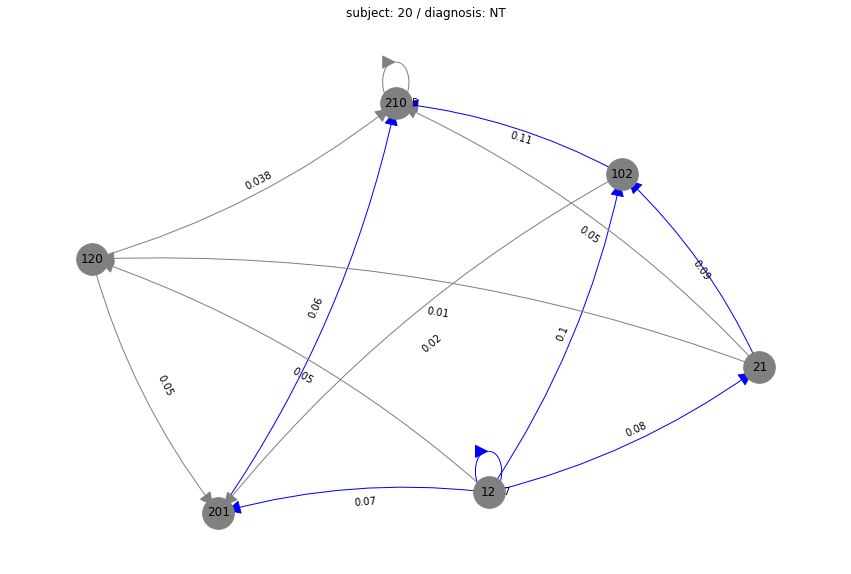

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  21


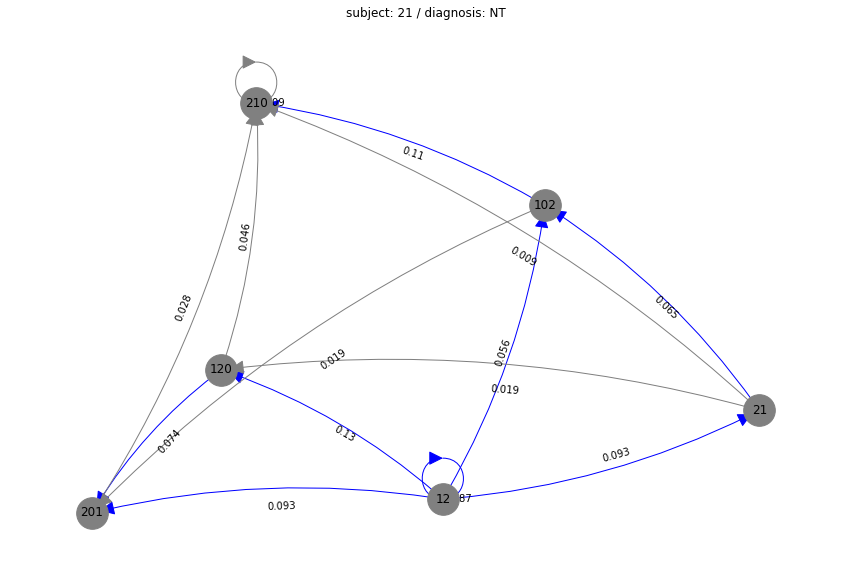

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  22


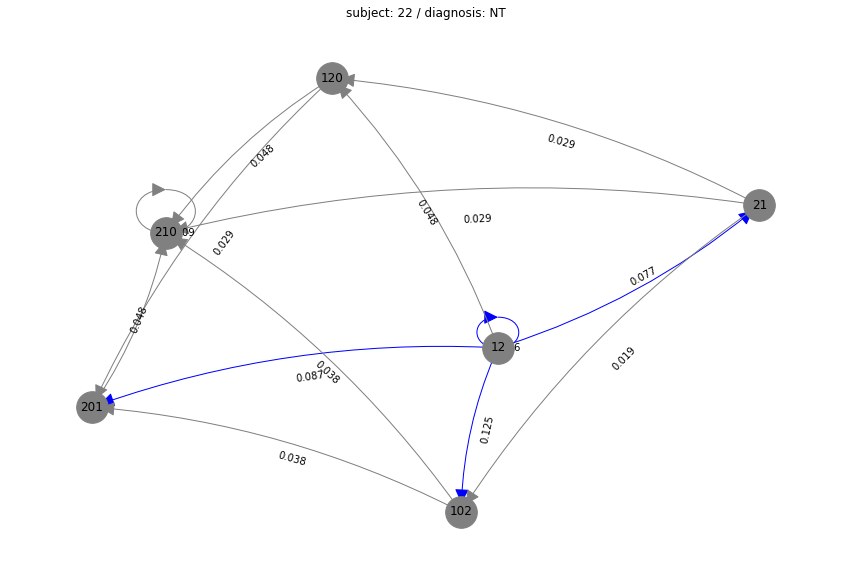

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  23


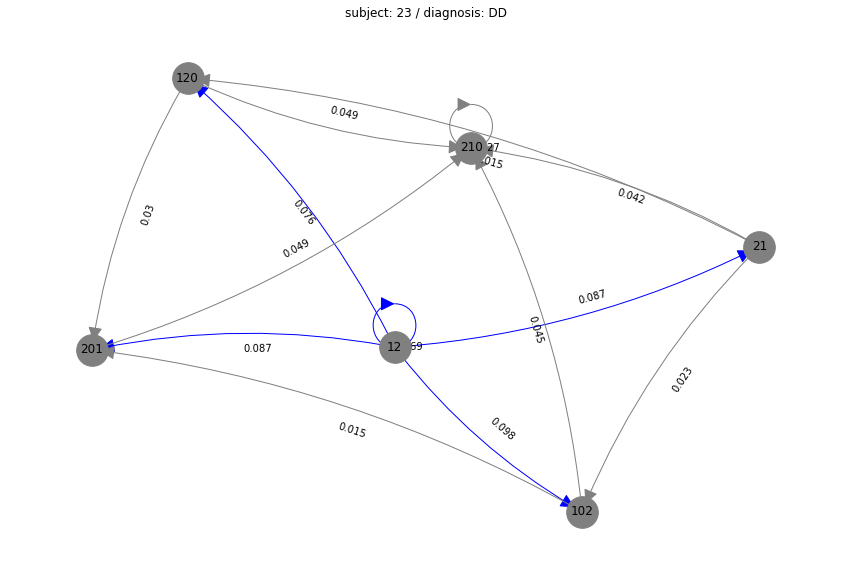

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  24


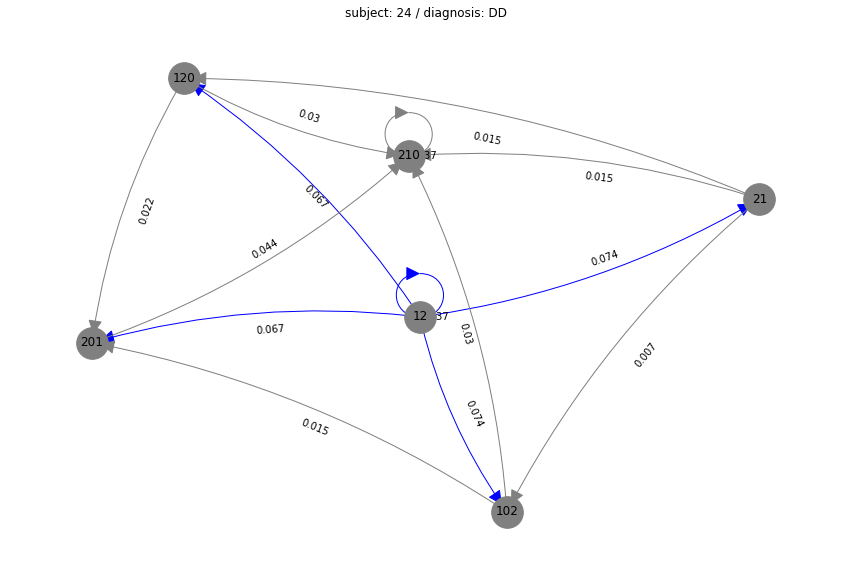

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  25


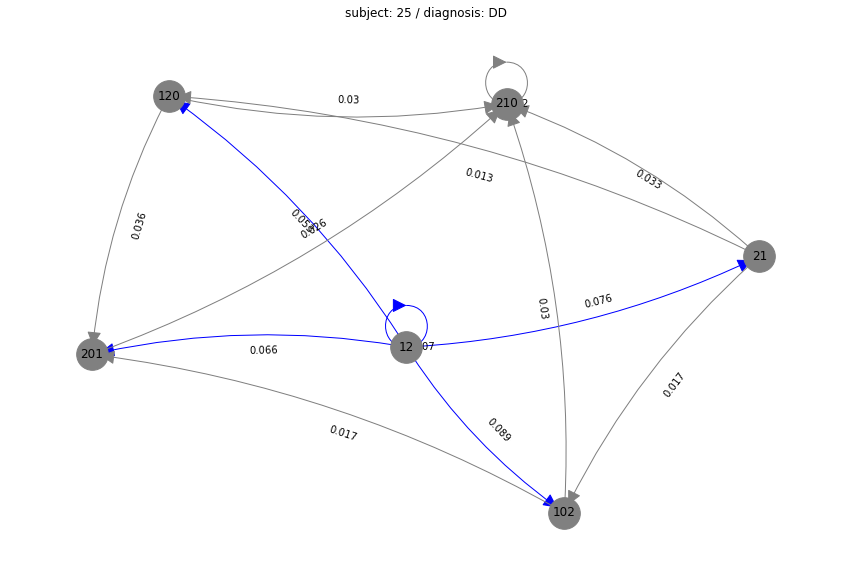

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  28


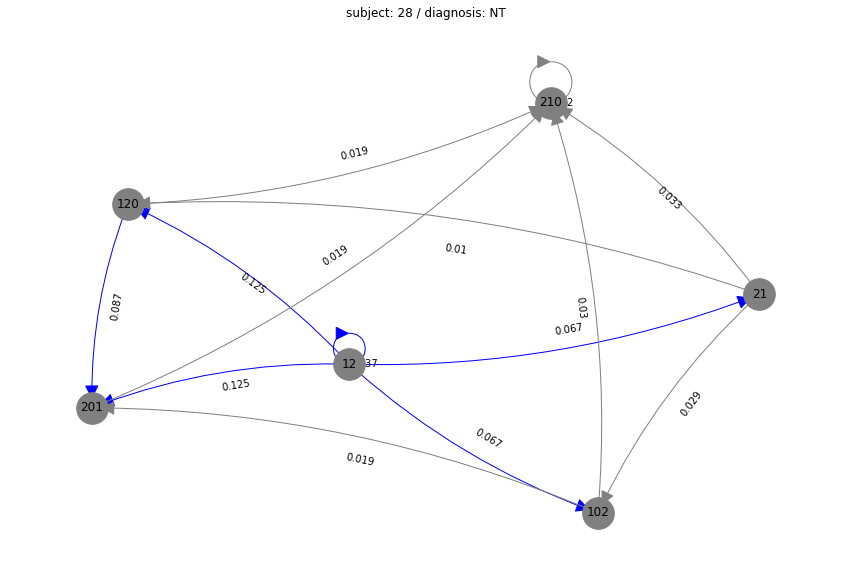

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  29


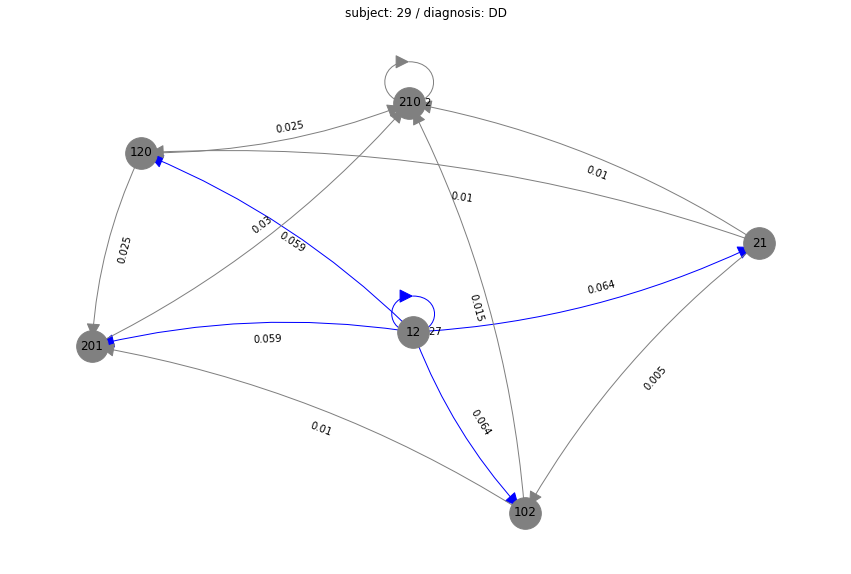

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  3-


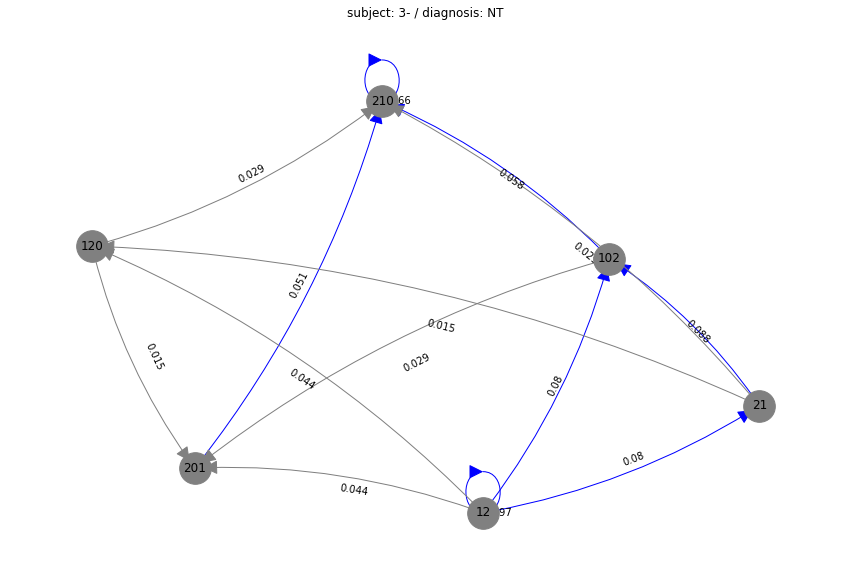

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  31


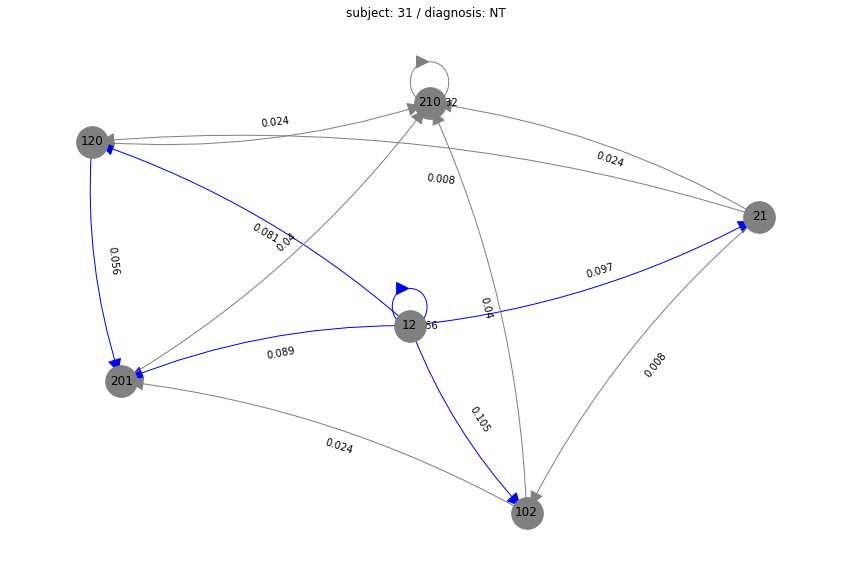

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  32


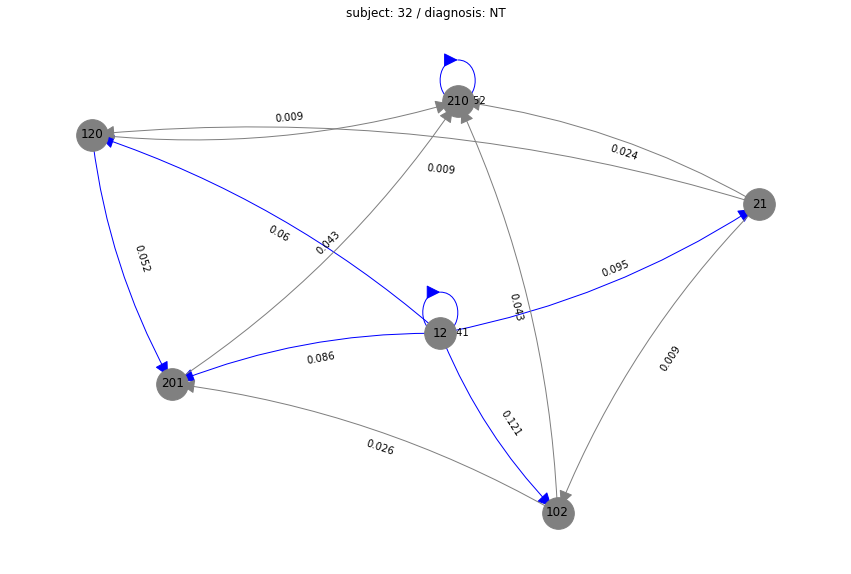

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  37


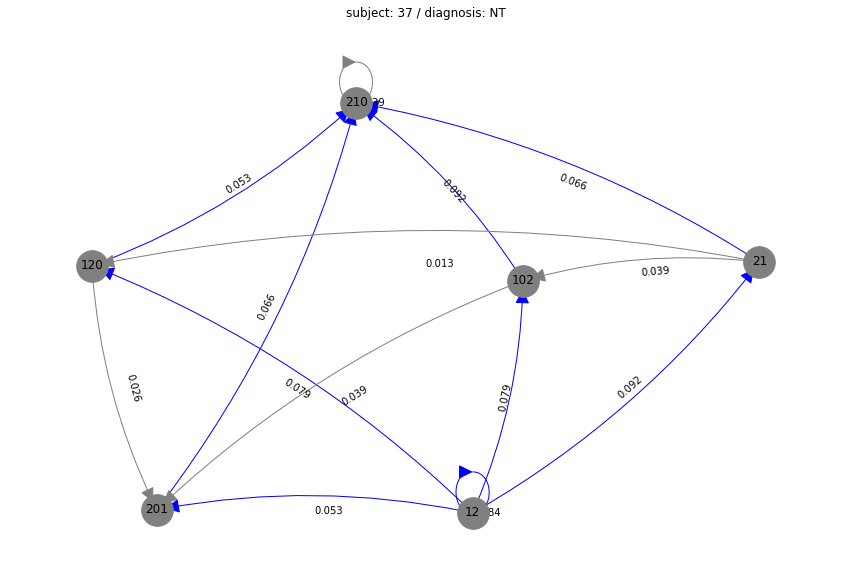

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  38


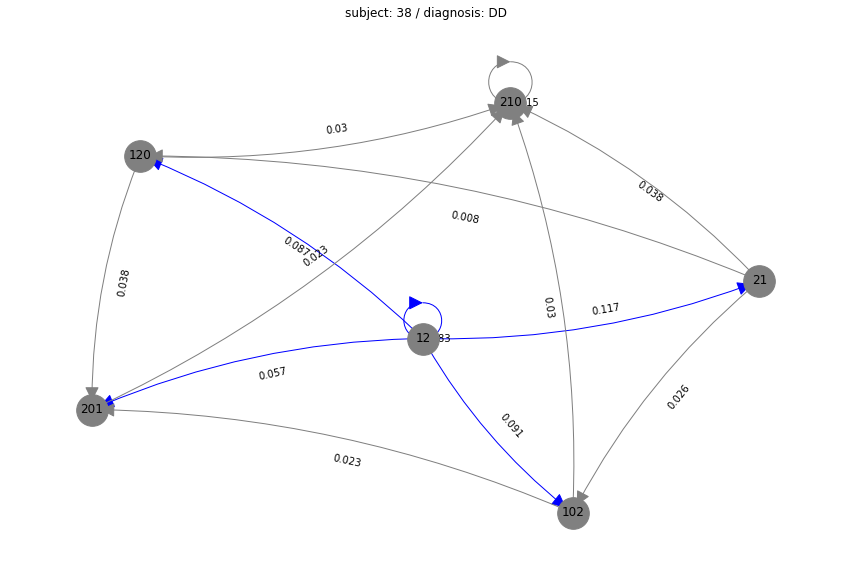

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  39


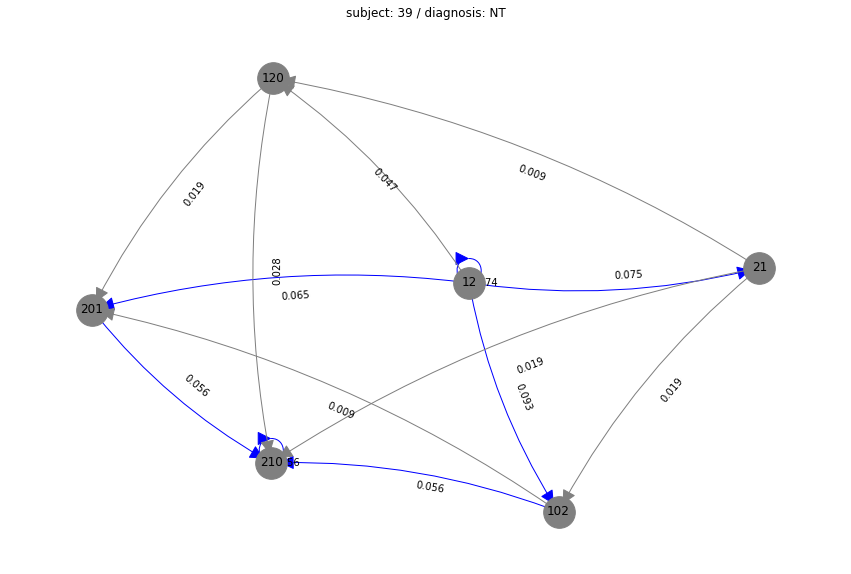

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  40


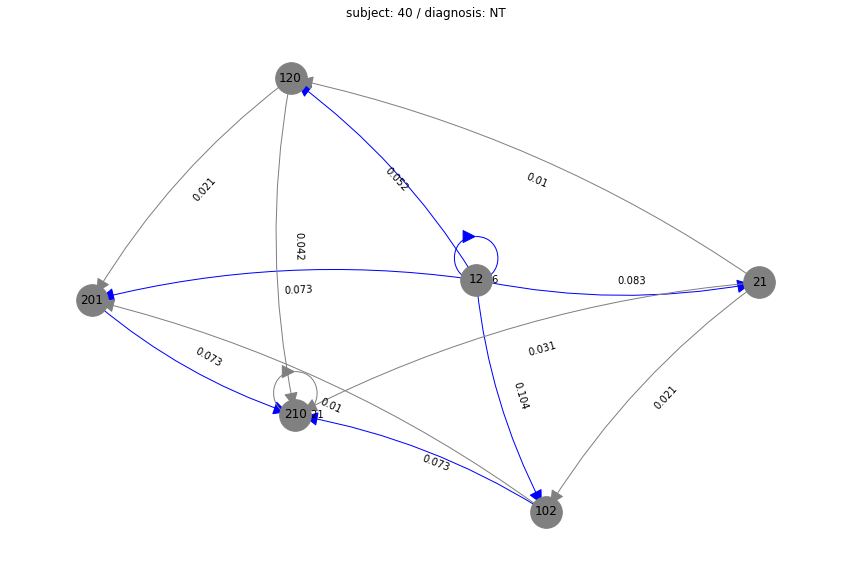

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  42


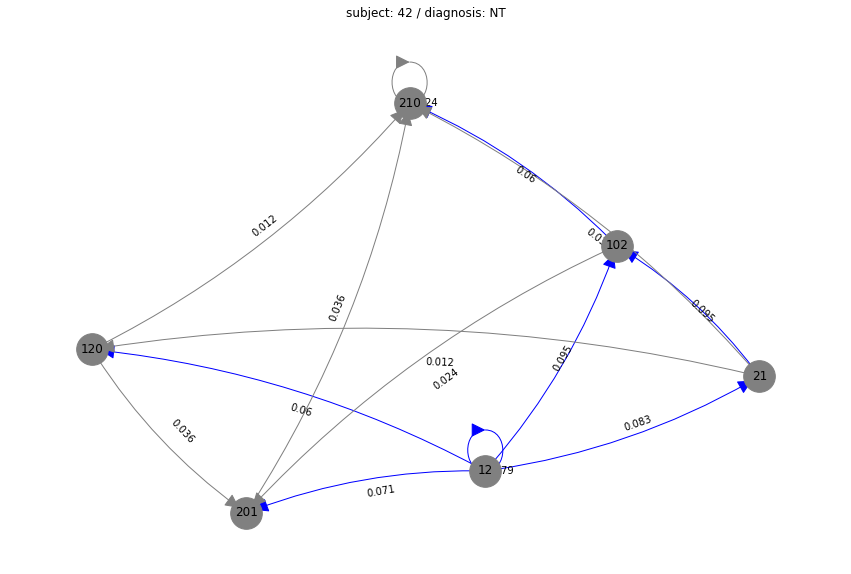

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  43


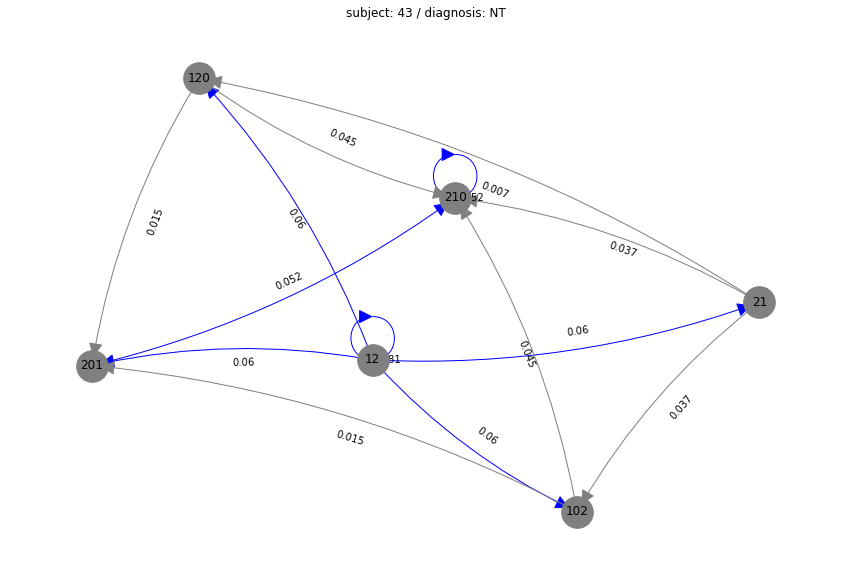

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  44


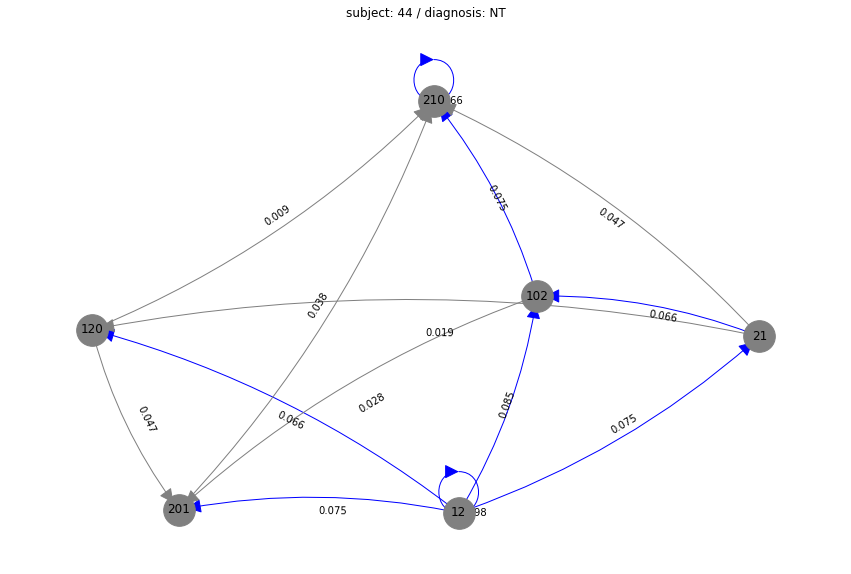

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  45


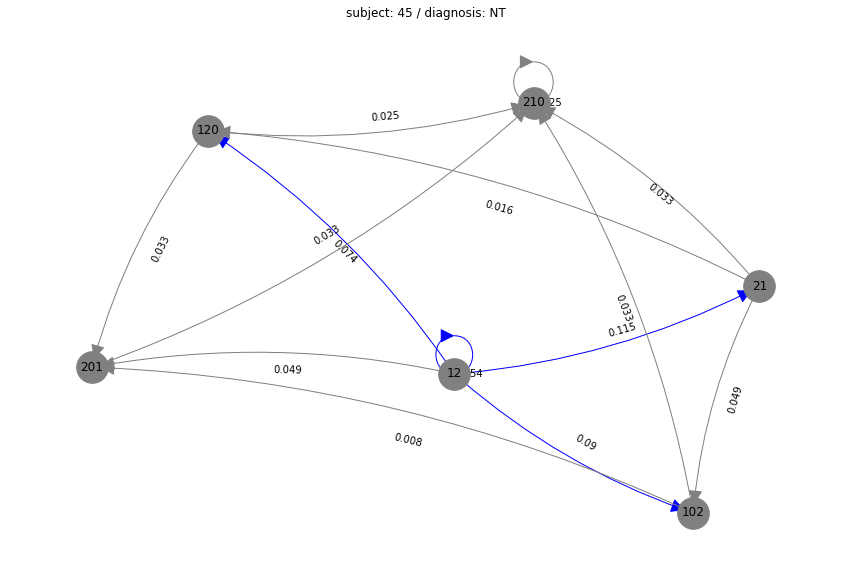

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  46


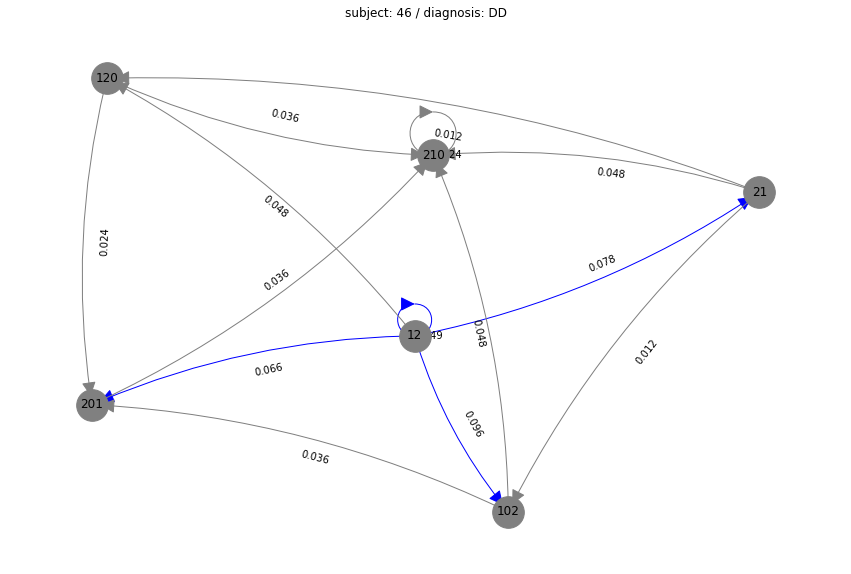

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  47


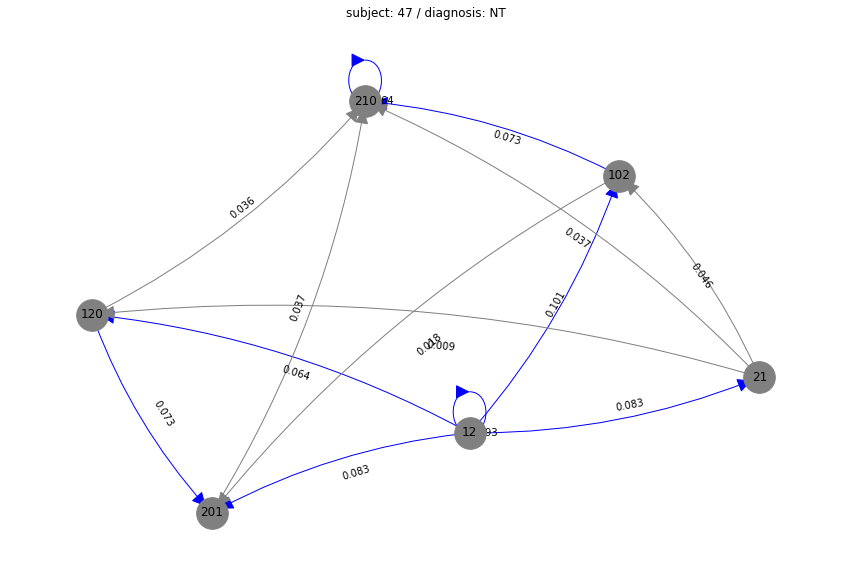

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  48


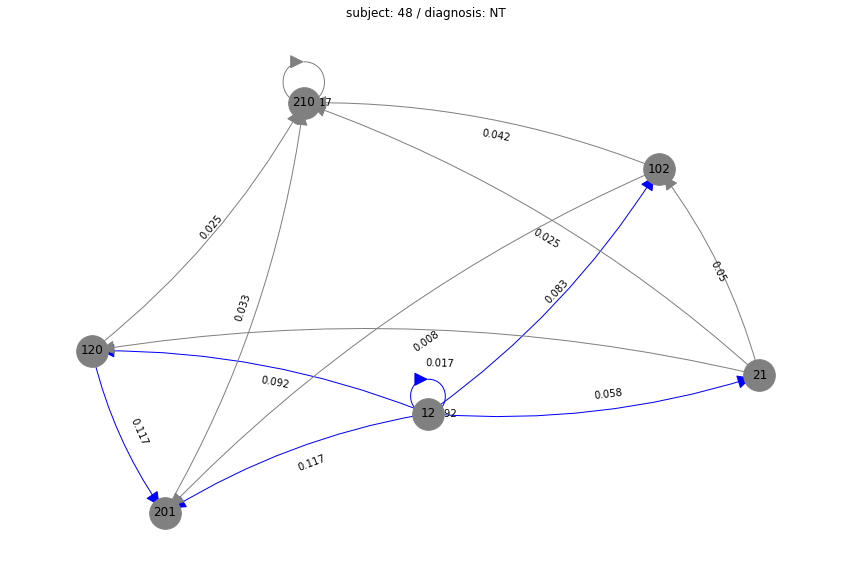

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  49


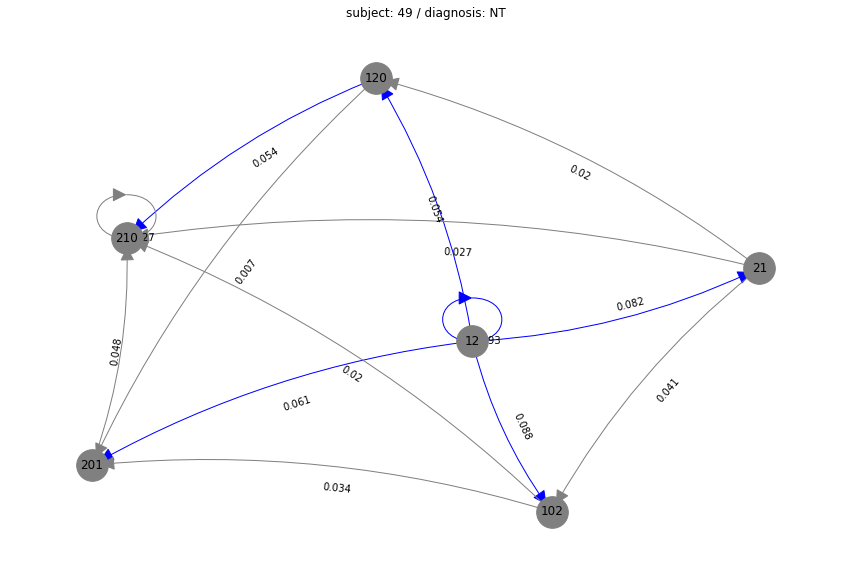

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  5-


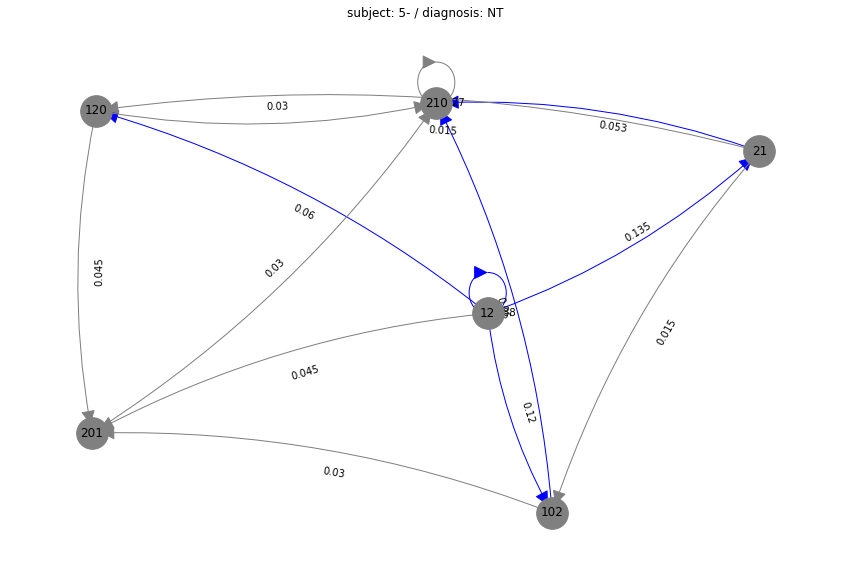

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  50


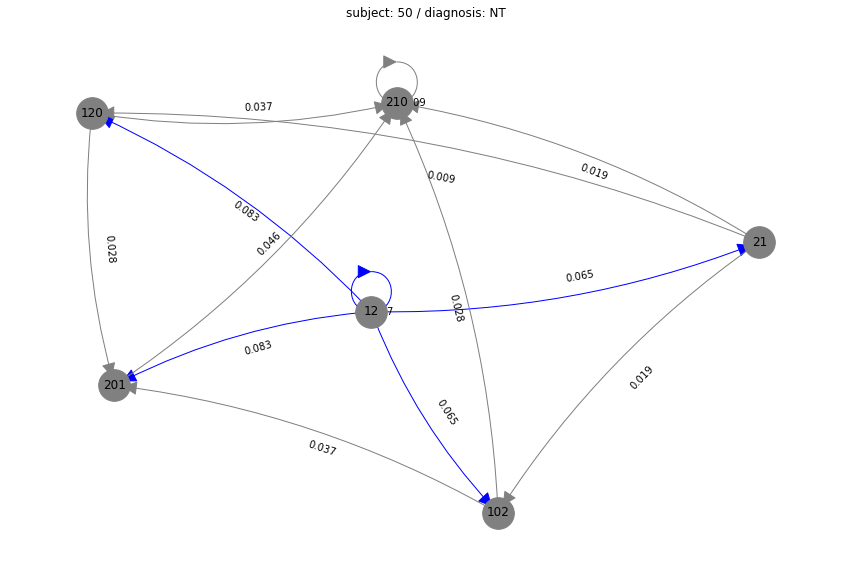

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  51


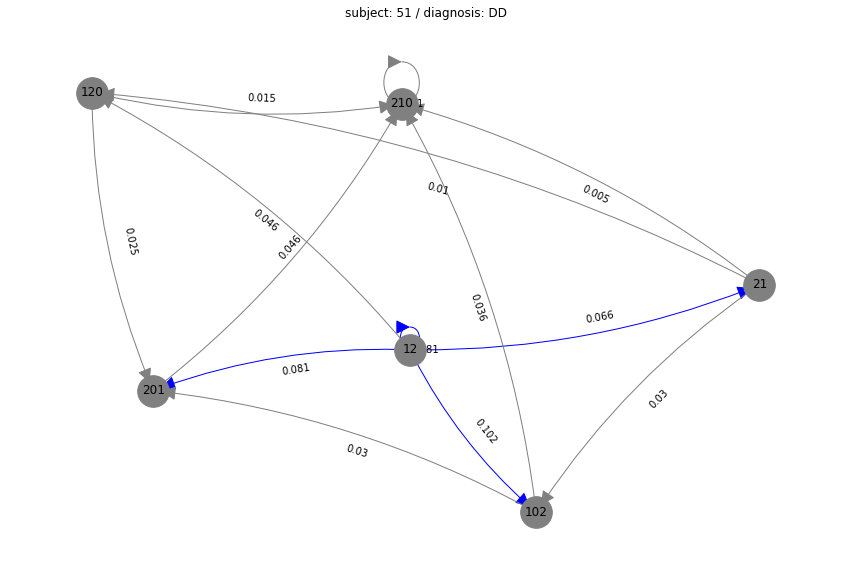

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  52


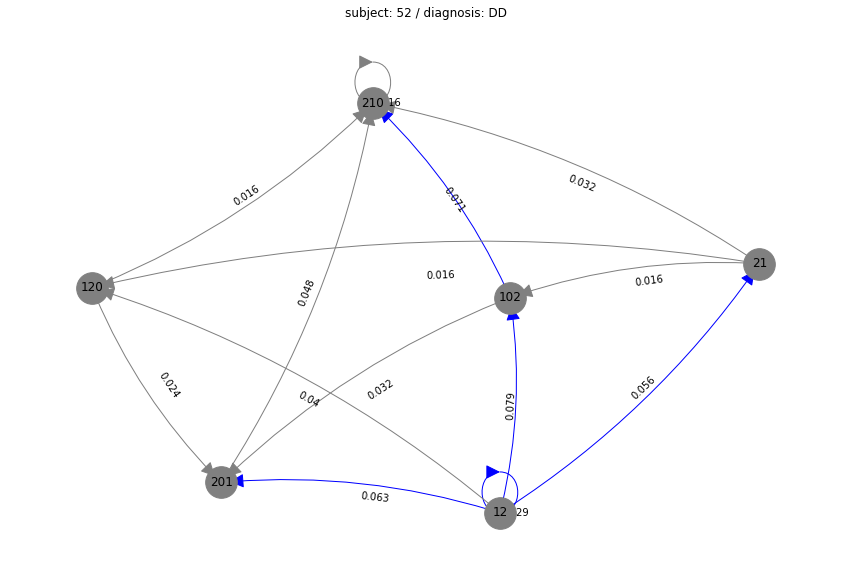

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  54


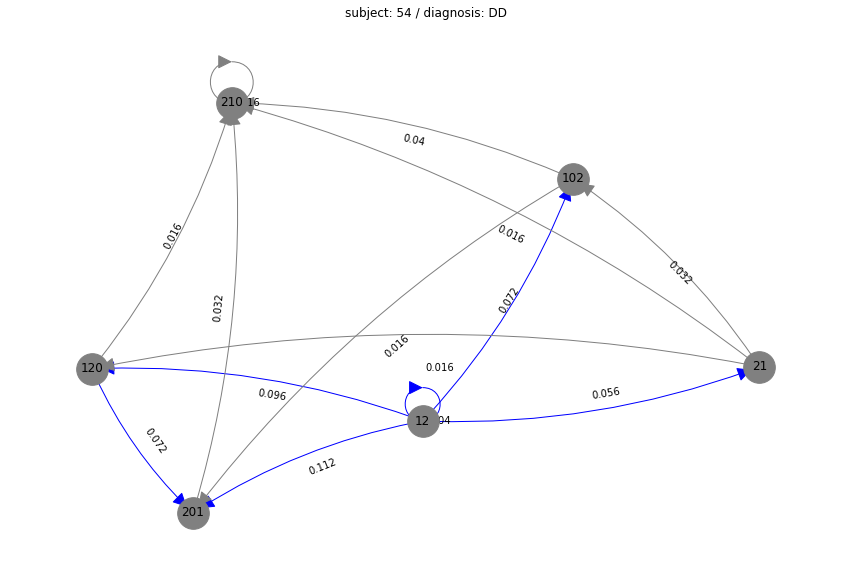

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  55


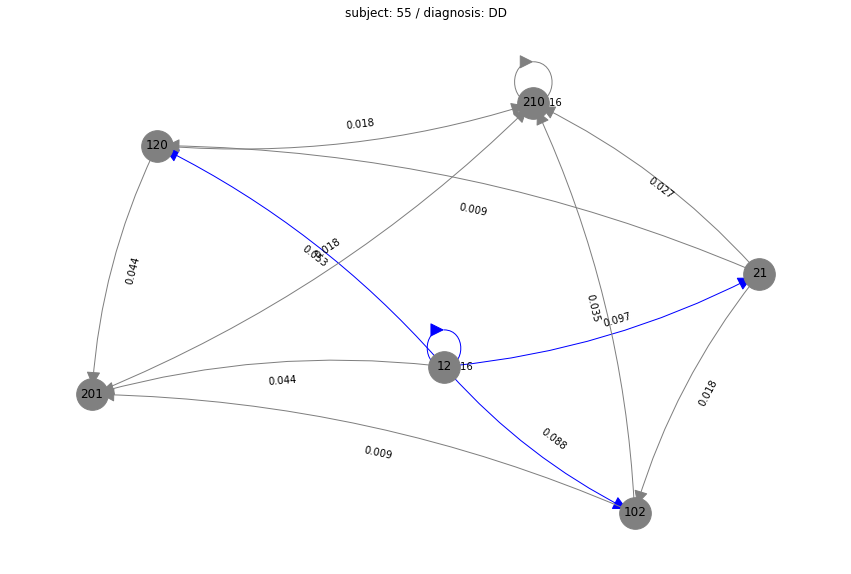

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  56


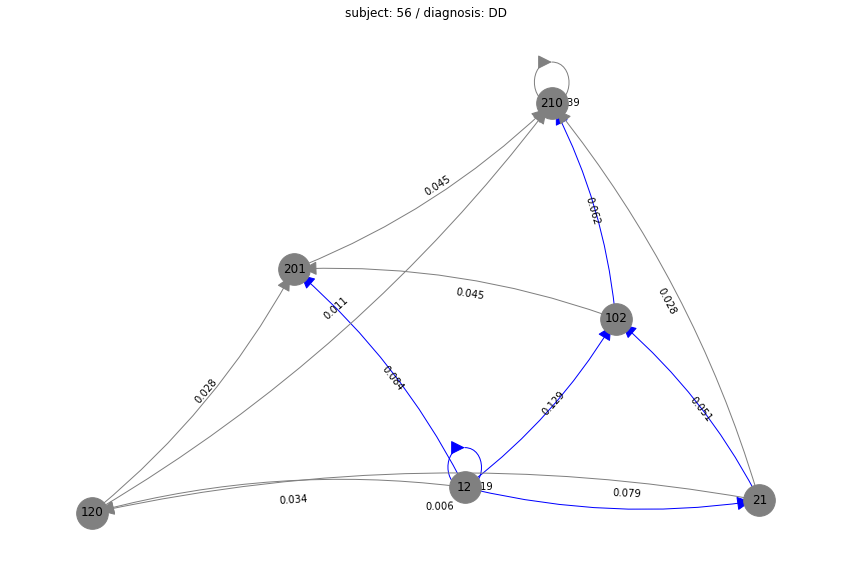

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  6-


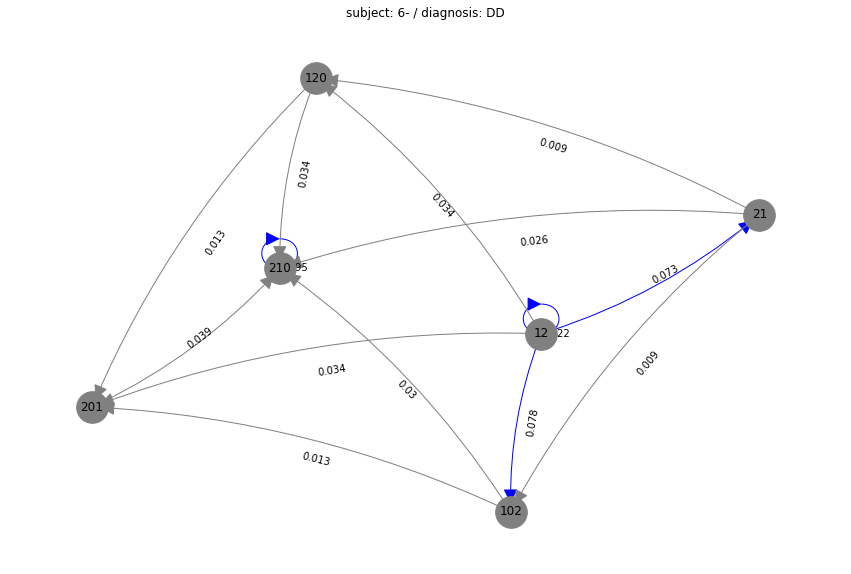

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
subject:  8-


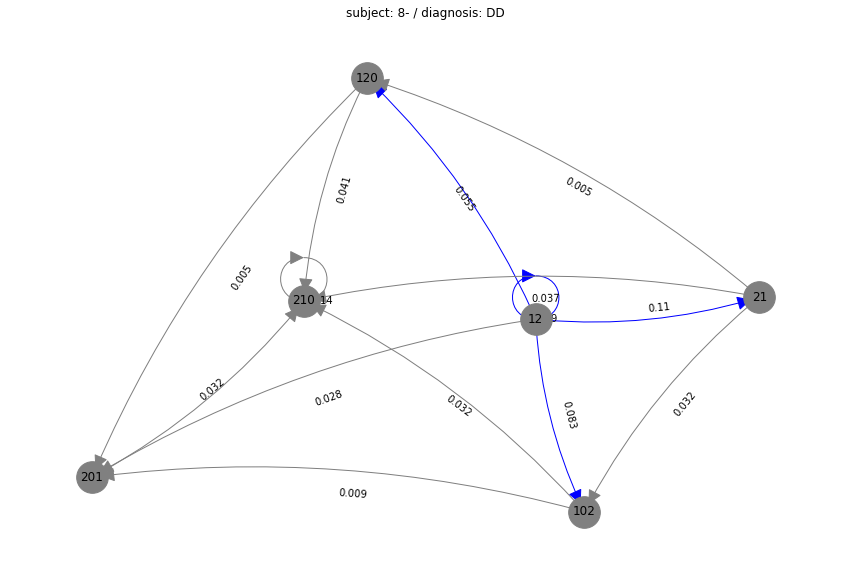

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]


In [249]:
adjacency_matrices = {}

for subject in subjects:
    print('subject: ', subject)
    # patterns of each subject
    subject_data = df_normal[df_normal.subject == subject]
    diag = subject_data.diag.unique()
    
    # add edges
    for index, row in subject_data.iterrows():
        G.add_edge(row["pattern_source"], row["pattern_target"], weight=row["normal_count"])      
    #print("aristas: ", G.edges)
    
    # adjacency matrices
    adjacency_matrices[subject] = nx.to_numpy_matrix(G)
    
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.05]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= .05]

    # positions for all nodes - seed for reproducibility
    pos = nx.spring_layout(G, seed=10) 
    
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='#808080')
    
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1, edge_color='blue',
                          arrows=True, arrowsize=30, connectionstyle='arc3,rad=0.1',
                          min_target_margin=1)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=1, edge_color="gray",
                          arrows=True, arrowsize=30, connectionstyle='arc3,rad=0.1',
                          min_target_margin=1)
    
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    weight_label_options = {"ec": "k", "fc": "white", "alpha": 0}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, bbox=weight_label_options,
                                 horizontalalignment='left', #{‘center’, ‘right’, ‘left’}
                                 verticalalignment='center') #{‘center’, ‘top’, ‘bottom’, ‘baseline’, ‘center_baseline’}

    ax = plt.gca()
    ax.margins(0.07)
    plt.axis("off")
    title = 'subject: ' + subject + ' / diagnosis: ' + diag[0]
    ax.set_title(title)
    name = 'graphs_subjects/' + str(diag[0]) + '_' + str(subject) + '.png'
    #plt.savefig(name)
    plt.show()
    
    print(A)

In [244]:
subjects

array(['1-', '10', '11', '12', '13', '14', '15', '16', '18', '19', '2-',
       '20', '21', '22', '23', '24', '25', '28', '29', '3-', '31', '32',
       '37', '38', '39', '40', '42', '43', '44', '45', '46', '47', '48',
       '49', '5-', '50', '51', '52', '54', '55', '56', '6-', '8-'],
      dtype=object)

In [248]:
adjacency_matrices['10']

matrix([[0.291, 0.071, 0.094, 0.071, 0.094, 0.   ],
        [0.071, 0.   , 0.024, 0.016, 0.   , 0.031],
        [0.094, 0.024, 0.   , 0.   , 0.039, 0.024],
        [0.071, 0.016, 0.   , 0.   , 0.055, 0.031],
        [0.094, 0.   , 0.039, 0.055, 0.   , 0.031],
        [0.   , 0.031, 0.024, 0.031, 0.031, 0.008]])

## Complejidad y entropía de las matrices

In [258]:
from scipy import linalg as la
import numpy as np
import math

In [343]:
# https://arxiv.org/abs/1209.2575
def von_neumann_entropy(matrix, cutoff=10):
    x = np.mat(matrix)
    one = np.identity(x.shape[0])
    base = one - x
    power = base*base
    result = np.trace(base)
    for k in range(2, cutoff):
        result -= np.trace(power) / (k*k - k)
        power = power.dot(base)
    result -= np.trace(power) / (cutoff - 1)
    return result / math.log(2)  

In [344]:
von_neumann_entropy(adjacency_matrices['1-'])

-0.5338279935057565

In [349]:
def von_neumann_entropy2(matrix):
    import numpy as np
    from scipy import linalg as la
    r = matrix*(la.logm(matrix)/la.logm(np.matrix([[2]])))
    result = -np.matrix.trace(r)
    return result

In [350]:
von_neumann_entropy2(adjacency_matrices['1-'])

matrix([[-0.026479+1.00695031j]])

In [295]:
def shannon_entropy(matrix):
    #from scipy.special import entr
    #result = entr(matrix).sum(axis=1)
    
    p = matrix / matrix.sum()
    result = -np.nansum(p*np.log2(p))
    return result

In [296]:
shannon_entropy(adjacency_matrices['1-'])

<ipython-input-295-07d38294c8c0>:6: RuntimeWarning: divide by zero encountered in log2
  result = -np.nansum(p*np.log2(p))


inf

## grupal

Yo sumaría los valores de cada transición de todos los sujetos de cada grupo. Una vez que termines de sumarlos, dividirlos por la suma de los valores de transiciones del grafo grupal. De esta manera las transiciones del grafo grupal sumarían 1.
Respecto a la entropía, el límite de p.log(p) con p tendiendo a cero es igual a cero así que tendrías que reemplazar los valores inf por 0. nosotros nos encontramos con este detalle también.

In [352]:
df_normal

,subject,diag,pattern_source,pattern_target,link,count,normal_count
0,1-,NT,12,12,012-012,17,0.142
1,1-,NT,12,21,012-021,13,0.108
2,1-,NT,12,201,012-201,11,0.092
3,1-,NT,21,102,021-102,16,0.133
4,1-,NT,21,120,021-120,1,0.008
...,...,...,...,...,...,...,...
704,8-,DD,201,120,201-120,1,0.005
705,8-,DD,201,210,201-210,7,0.032
706,8-,DD,210,102,210-102,7,0.032
707,8-,DD,210,120,210-120,9,0.041


In [353]:
nt_normalgroup = df_normal[df_normal.diag == 'NT']
dd_normalgroup = df_normal[df_normal.diag == 'DD']

In [392]:
dd_normalgroup

,subject,diag,pattern_source,pattern_target,link,count,normal_count
123,18,DD,12,12,012-012,45,0.433
124,18,DD,12,21,012-021,8,0.077
125,18,DD,12,201,012-201,5,0.048
126,18,DD,21,102,021-102,2,0.019
127,18,DD,21,120,021-120,2,0.019
...,...,...,...,...,...,...,...
704,8-,DD,201,120,201-120,1,0.005
705,8-,DD,201,210,201-210,7,0.032
706,8-,DD,210,102,210-102,7,0.032
707,8-,DD,210,120,210-120,9,0.041


In [357]:
# subjects
links = df_normal.link.unique()
links

array(['012-012', '012-021', '012-201', '021-102', '021-120', '021-210',
       '102-012', '102-021', '102-201', '120-012', '120-021', '120-201',
       '201-102', '201-120', '201-210', '210-102', '210-120', '210-210'],
      dtype=object)

In [393]:
#nt_normalgroup
df_normalgroup = pd.DataFrame()

for link in links:
    subjects_diag = nt_normalgroup['diag'][nt_normalgroup.link == link].unique()
    subjects_pattern_source = nt_normalgroup['pattern_source'][nt_normalgroup.link == link].unique()
    subjects_pattern_target = nt_normalgroup['pattern_target'][nt_normalgroup.link == link].unique()
    
    subjects_normalcount = nt_normalgroup['normal_count'][nt_normalgroup.link == link]
    sum_subjects_normalcount = subjects_normalcount.sum()
    mean_sum_group = (sum_subjects_normalcount / len(subjects_normalcount)).round(3)

    temp = pd.DataFrame({'diag': subjects_diag,
                         'link': link, 
                         'pattern_source': subjects_pattern_source,
                         'pattern_target': subjects_pattern_target,
                         'sum_normal_count': sum_subjects_normalcount, 
                         'mean_normal_count': mean_sum_group})
    df_normalgroup = pd.concat([df_normalgroup, temp])
    
df_normalgroup

,diag,link,pattern_source,pattern_target,sum_normal_count,mean_normal_count
0,NT,012-012,12,12,8.450,0.291
0,NT,012-021,12,21,2.156,0.077
0,NT,012-201,12,201,2.407,0.083
0,NT,021-102,21,102,2.208,0.079
0,NT,021-120,21,120,0.358,0.016
0,NT,021-210,21,210,0.714,0.030
0,NT,102-012,102,12,2.597,0.090
0,NT,102-021,102,21,0.848,0.037
0,NT,102-201,102,201,0.591,0.024
0,NT,120-012,120,12,2.041,0.070


In [394]:
print(df_normalgroup.mean_normal_count.sum())

1.047


In [395]:
## dd_normalgroup
for link in links:
    subjects_diag = dd_normalgroup['diag'][dd_normalgroup.link == link].unique()
    subjects_pattern_source = dd_normalgroup['pattern_source'][dd_normalgroup.link == link].unique()
    subjects_pattern_target = dd_normalgroup['pattern_target'][dd_normalgroup.link == link].unique()
    
    subjects_normalcount = dd_normalgroup['normal_count'][dd_normalgroup.link == link]
    sum_subjects_normalcount = subjects_normalcount.sum()
    mean_sum_group = (sum_subjects_normalcount / len(subjects_normalcount)).round(3)

    temp = pd.DataFrame({'diag': subjects_diag,
                         'link': link, 
                         'pattern_source': subjects_pattern_source,
                         'pattern_target': subjects_pattern_target,
                         'sum_normal_count': sum_subjects_normalcount, 
                         'mean_normal_count': mean_sum_group})
    df_normalgroup = pd.concat([df_normalgroup, temp])
    
df_normalgroup

,diag,link,pattern_source,pattern_target,sum_normal_count,mean_normal_count
0,NT,012-012,12,12,8.450,0.291
0,NT,012-021,12,21,2.156,0.077
0,NT,012-201,12,201,2.407,0.083
0,NT,021-102,21,102,2.208,0.079
0,NT,021-120,21,120,0.358,0.016
0,NT,021-210,21,210,0.714,0.030
0,NT,102-012,102,12,2.597,0.090
0,NT,102-021,102,21,0.848,0.037
0,NT,102-201,102,201,0.591,0.024
0,NT,120-012,120,12,2.041,0.070


In [396]:
print(df_normalgroup.mean_normal_count.sum())

2.058


In [399]:
print(df_normalgroup.mean_normal_count.mean())

0.057166666666666664


In [397]:
df_normalgroup.to_csv('mean_normal_count.csv')

In [398]:
diags = df_normalgroup['diag'].unique()
diags

array(['NT', 'DD'], dtype=object)

diag:  NT


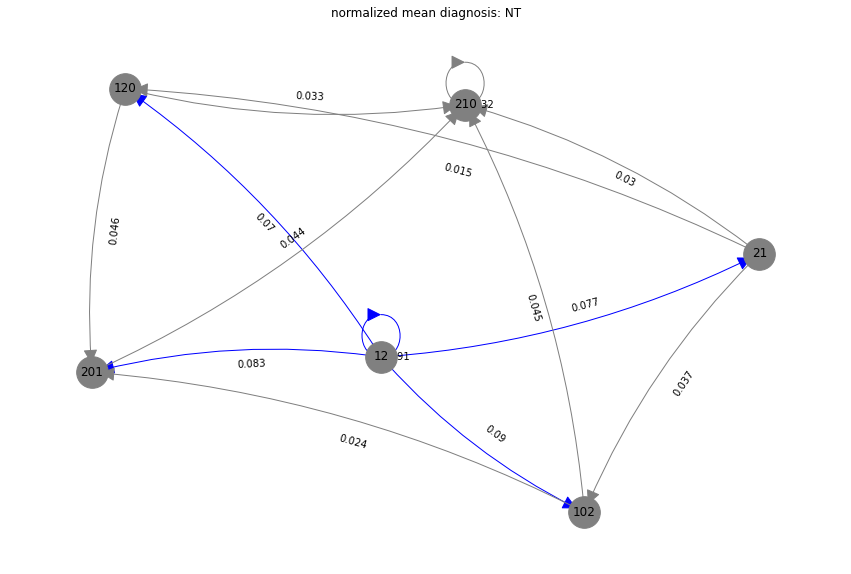

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]
diag:  DD


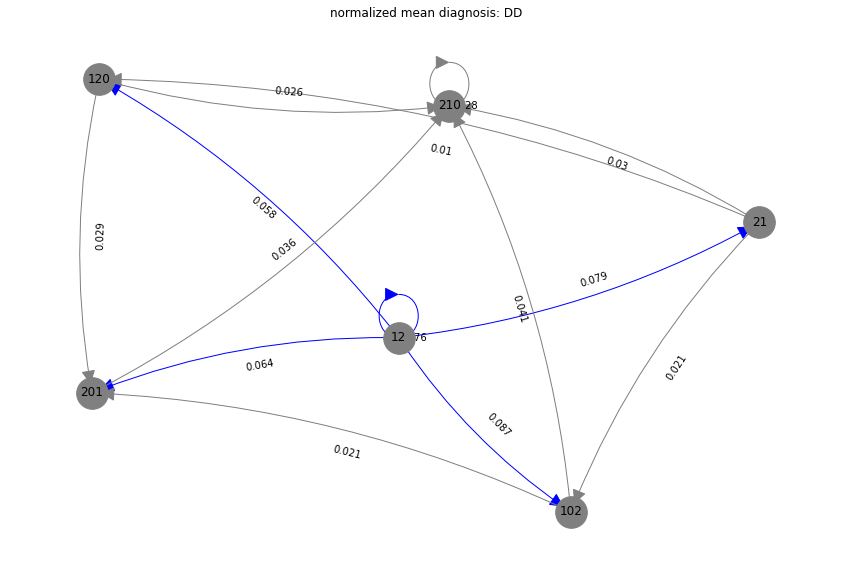

[[0.39  0.11  0.083 0.055 0.028 0.   ]
 [0.11  0.    0.032 0.005 0.    0.037]
 [0.083 0.032 0.    0.    0.009 0.032]
 [0.055 0.005 0.    0.    0.005 0.041]
 [0.028 0.    0.009 0.005 0.    0.032]
 [0.    0.037 0.032 0.041 0.032 0.014]]


In [400]:
diag_adjacency_matrices = {}

for diag in diags:
    print('diag: ', diag)
    # patterns of each subject
    data = df_normalgroup[df_normalgroup.diag == diag]
    
    # add edges
    for index, row in data.iterrows():
        G.add_edge(row["pattern_source"], row["pattern_target"], weight=row["mean_normal_count"])      
    #print("aristas: ", G.edges)
    
    # adjacency matrices
    diag_adjacency_matrices[diag] = nx.to_numpy_matrix(G)
    
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.05]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.05]

    # positions for all nodes - seed for reproducibility
    pos = nx.spring_layout(G, seed=10) 
    
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='#808080')
    
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1, edge_color='blue',
                          arrows=True, arrowsize=30, connectionstyle='arc3,rad=0.1',
                          min_target_margin=1)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=1, edge_color="gray",
                          arrows=True, arrowsize=30, connectionstyle='arc3,rad=0.1',
                          min_target_margin=1)
    
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    weight_label_options = {"ec": "k", "fc": "white", "alpha": 0}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, bbox=weight_label_options,
                                 horizontalalignment='left', #{‘center’, ‘right’, ‘left’}
                                 verticalalignment='center') #{‘center’, ‘top’, ‘bottom’, ‘baseline’, ‘center_baseline’}

    ax = plt.gca()
    ax.margins(0.07)
    plt.axis("off")
    title = 'normalized mean diagnosis: ' + diag
    ax.set_title(title)
    name = 'graphs_subjects/normalized_mean_diagnosis_'+ str(diag) +'.png'
    plt.savefig(name)
    plt.show()
    
    print(A)

In [410]:
adjacency_matrices['DD']

matrix([[0.376, 0.079, 0.087, 0.058, 0.064, 0.   ],
        [0.079, 0.   , 0.021, 0.01 , 0.   , 0.03 ],
        [0.087, 0.021, 0.   , 0.   , 0.021, 0.041],
        [0.058, 0.01 , 0.   , 0.   , 0.029, 0.026],
        [0.064, 0.   , 0.021, 0.029, 0.   , 0.036],
        [0.   , 0.03 , 0.041, 0.026, 0.036, 0.028]])

In [403]:
shannon_entropy(adjacency_matrices['NT'])

<ipython-input-295-07d38294c8c0>:6: RuntimeWarning: divide by zero encountered in log2
  result = -np.nansum(p*np.log2(p))


inf

In [404]:
shannon_entropy(adjacency_matrices['DD'])

<ipython-input-295-07d38294c8c0>:6: RuntimeWarning: divide by zero encountered in log2
  result = -np.nansum(p*np.log2(p))


inf

In [405]:
von_neumann_entropy2(adjacency_matrices['NT'])

matrix([[0.30123719+0.69271273j]])

In [406]:
von_neumann_entropy2(adjacency_matrices['DD'])

matrix([[0.36844028+0.50827121j]])